In [ ]:
from google.colab import files

# Upload the kaggle.json file
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"chirruu","key":"cd16d09d509fe631184a948093dd5919"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
# Download the dataset
!kaggle datasets download -d enesztrk/goemotions-dataset2

Dataset URL: https://www.kaggle.com/datasets/enesztrk/goemotions-dataset2
License(s): unknown


In [ ]:
# Unzip the dataset
!unzip goemotions-dataset2.zip

Archive:  goemotions-dataset2.zip
  inflating: goemotions_2.csv        


 Initial Dataset Loading

In [ ]:
import pandas as pd

# Load dataset
dataset_path = "/content/goemotions_2.csv"
df = pd.read_csv(dataset_path)

# Display initial data
print("Initial dataset:")
print(f"Shape: {df.shape}")
print("\nFirst 3 rows:")
print(df.head(5))

Initial dataset:
Shape: (70000, 37)

First 3 rows:
                                                text       id  \
0                                        We can hope  ee3o3ko   
1                     Shhh don't give them the idea!  eebl3z7   
2  Thank you so much, kind stranger. I really nee...  ed4fe9l   
3  Ion know but it would be better for you to jus...  efavtdu   
4  I'm honestly surprised. We should have fallen ...  ee2imz2   

               author            subreddit    link_id   parent_id  \
0       darkenseyreth       EdmontonOilers  t3_ag4r9j  t1_ee3mhad   
1   BoinkBoinkEtAliae      MurderedByWords  t3_ah3o76  t1_eeb68lo   
2          savageleaf  raisedbynarcissists  t3_abwh00  t1_ed4etbj   
3           CADDiLLXC              darknet  t3_al4njw   t3_al4njw   
4  CorporalThornberry    CollegeBasketball  t3_afxt6t  t1_ee22nyr   

    created_utc  rater_id  example_very_unclear  admiration  ...  love  \
0  1.547529e+09        62                 False           0  ...     

In [ ]:
import pandas as pd

# Load your dataset
df = pd.read_csv("/content/goemotions_2.csv")

# Print all columns in the dataset
print("All columns in the dataset:")
for i, column in enumerate(df.columns, 1):
    print(f"{i}. {column}")

# Alternative simple version:
print("\nAlternative display:")
print(df.columns.tolist())

# Print with column data types
print("\nColumns with data types:")
print(df.dtypes)

All columns in the dataset:
1. text
2. id
3. author
4. subreddit
5. link_id
6. parent_id
7. created_utc
8. rater_id
9. example_very_unclear
10. admiration
11. amusement
12. anger
13. annoyance
14. approval
15. caring
16. confusion
17. curiosity
18. desire
19. disappointment
20. disapproval
21. disgust
22. embarrassment
23. excitement
24. fear
25. gratitude
26. grief
27. joy
28. love
29. nervousness
30. optimism
31. pride
32. realization
33. relief
34. remorse
35. sadness
36. surprise
37. neutral

Alternative display:
['text', 'id', 'author', 'subreddit', 'link_id', 'parent_id', 'created_utc', 'rater_id', 'example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

Columns with data types:
text 

Top 5 columns with the most sentences:
text         70000
id           70000
author       70000
subreddit    70000
link_id      70000
dtype: int64


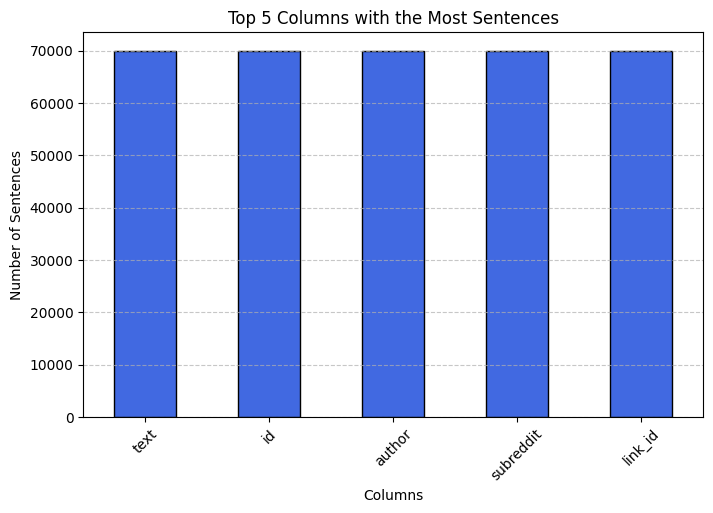

In [ ]:
import matplotlib.pyplot as plt
# Count non-null values in each column
column_counts = df.count()

# Get the top 5 columns with the most sentences
top_5_columns = column_counts.nlargest(5)

# Print the top 5 columns
print("Top 5 columns with the most sentences:")
print(top_5_columns)

# Plot the top 5 columns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
top_5_columns.plot(kind='bar', color='royalblue', edgecolor='black')
plt.xlabel("Columns")
plt.ylabel("Number of Sentences")
plt.title("Top 5 Columns with the Most Sentences")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


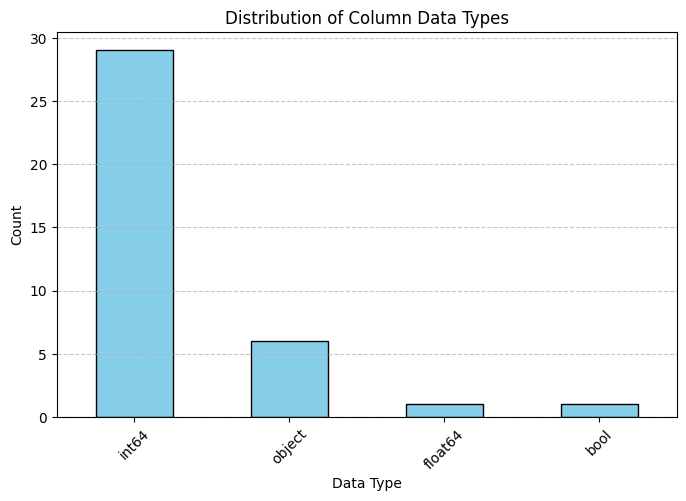

In [ ]:
import matplotlib.pyplot as plt

# Get column data types
dtype_counts = df.dtypes.value_counts()

# Plot the data types count
plt.figure(figsize=(8, 5))
dtype_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.xlabel("Data Type")
plt.ylabel("Count")
plt.title("Distribution of Column Data Types")
plt.xticks(rotation=45)
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show the plot
plt.show()


Lowercasing

In [ ]:
# Lowercasing only
df['lower_text'] =df['text'].str.lower()

# Show before/after
print("\nLowercasing results:")
for i in range(5):
    print(f"Original: {df['text'].iloc[i]}")
    print(f"Lowered:  {df['lower_text'].iloc[i]}\n")


Lowercasing results:
Original: We can hope
Lowered:  we can hope

Original: Shhh don't give them the idea!
Lowered:  shhh don't give them the idea!

Original: Thank you so much, kind stranger. I really need that
Lowered:  thank you so much, kind stranger. i really need that

Original: Ion know but it would be better for you to just buy some trim and make them yourself, its not that hard and you can dose it
Lowered:  ion know but it would be better for you to just buy some trim and make them yourself, its not that hard and you can dose it

Original: I'm honestly surprised. We should have fallen much farther
Lowered:  i'm honestly surprised. we should have fallen much farther



Removing URLs, Mentions, Hashtags and Special Characters

In [ ]:
import re

def remove_special_chars(text):
    text = str(text)
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+|#\w+', '', text)
    return re.sub(r'[^\w\s]', ' ', text)

df['no_special_text'] = df['text'].apply(remove_special_chars)

# Show before/after
print("\nSpecial Character Removal:")
for i in range(5):
    print(f"Original: {df['text'].iloc[i]}")
    print(f"Cleaned:  {df['no_special_text'].iloc[i]}\n")


Special Character Removal:
Original: We can hope
Cleaned:  We can hope

Original: Shhh don't give them the idea!
Cleaned:  Shhh don t give them the idea 

Original: Thank you so much, kind stranger. I really need that
Cleaned:  Thank you so much  kind stranger  I really need that

Original: Ion know but it would be better for you to just buy some trim and make them yourself, its not that hard and you can dose it
Cleaned:  Ion know but it would be better for you to just buy some trim and make them yourself  its not that hard and you can dose it

Original: I'm honestly surprised. We should have fallen much farther
Cleaned:  I m honestly surprised  We should have fallen much farther



 Tokenization

In [ ]:
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize

df['tokenized_text'] = df['no_special_text'].apply(word_tokenize)

print("\nTokenization Results:")
for i in range(5):
    print(f"Original: {df['no_special_text'].iloc[i]}")
    print(f"Tokens:   {df['tokenized_text'].iloc[i]}\n")

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.



Tokenization Results:
Original: We can hope
Tokens:   ['We', 'can', 'hope']

Original: Shhh don t give them the idea 
Tokens:   ['Shhh', 'don', 't', 'give', 'them', 'the', 'idea']

Original: Thank you so much  kind stranger  I really need that
Tokens:   ['Thank', 'you', 'so', 'much', 'kind', 'stranger', 'I', 'really', 'need', 'that']

Original: Ion know but it would be better for you to just buy some trim and make them yourself  its not that hard and you can dose it
Tokens:   ['Ion', 'know', 'but', 'it', 'would', 'be', 'better', 'for', 'you', 'to', 'just', 'buy', 'some', 'trim', 'and', 'make', 'them', 'yourself', 'its', 'not', 'that', 'hard', 'and', 'you', 'can', 'dose', 'it']

Original: I m honestly surprised  We should have fallen much farther
Tokens:   ['I', 'm', 'honestly', 'surprised', 'We', 'should', 'have', 'fallen', 'much', 'farther']



. Stopword Removal with Negation Preservation

In [ ]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

stop_words = set(stopwords.words('english'))
negation_words = {'no', 'not', 'nor', 'neither', 'never', 'none'}

def remove_stopwords(tokens):
    return [word for word in tokens if word not in stop_words or word in negation_words]

df['stopword_removed'] = df['tokenized_text'].apply(remove_stopwords)

print("\nStopword Removal Results:")
for i in range(5):
    print(f"Original: {df['tokenized_text'].iloc[i]}")
    print(f"Filtered: {df['stopword_removed'].iloc[i]}\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.



Stopword Removal Results:
Original: ['We', 'can', 'hope']
Filtered: ['We', 'hope']

Original: ['Shhh', 'don', 't', 'give', 'them', 'the', 'idea']
Filtered: ['Shhh', 'give', 'idea']

Original: ['Thank', 'you', 'so', 'much', 'kind', 'stranger', 'I', 'really', 'need', 'that']
Filtered: ['Thank', 'much', 'kind', 'stranger', 'I', 'really', 'need']

Original: ['Ion', 'know', 'but', 'it', 'would', 'be', 'better', 'for', 'you', 'to', 'just', 'buy', 'some', 'trim', 'and', 'make', 'them', 'yourself', 'its', 'not', 'that', 'hard', 'and', 'you', 'can', 'dose', 'it']
Filtered: ['Ion', 'know', 'would', 'better', 'buy', 'trim', 'make', 'not', 'hard', 'dose']

Original: ['I', 'm', 'honestly', 'surprised', 'We', 'should', 'have', 'fallen', 'much', 'farther']
Filtered: ['I', 'honestly', 'surprised', 'We', 'fallen', 'much', 'farther']



Lemmatization

In [ ]:
import nltk
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

def lemmatize_tokens(tokens):
    return [lemmatizer.lemmatize(word, pos='v') for word in tokens]

df['lemmatized_text'] = df['stopword_removed'].apply(lemmatize_tokens)

print("\nLemmatization Results:")
for i in range(5):
    print(f"Before: {df['stopword_removed'].iloc[i]}")
    print(f"After:  {df['lemmatized_text'].iloc[i]}\n")

[nltk_data] Downloading package wordnet to /root/nltk_data...



Lemmatization Results:
Before: ['We', 'hope']
After:  ['We', 'hope']

Before: ['Shhh', 'give', 'idea']
After:  ['Shhh', 'give', 'idea']

Before: ['Thank', 'much', 'kind', 'stranger', 'I', 'really', 'need']
After:  ['Thank', 'much', 'kind', 'stranger', 'I', 'really', 'need']

Before: ['Ion', 'know', 'would', 'better', 'buy', 'trim', 'make', 'not', 'hard', 'dose']
After:  ['Ion', 'know', 'would', 'better', 'buy', 'trim', 'make', 'not', 'hard', 'dose']

Before: ['I', 'honestly', 'surprised', 'We', 'fallen', 'much', 'farther']
After:  ['I', 'honestly', 'surprise', 'We', 'fall', 'much', 'farther']



 Final Cleaned Text

In [ ]:
# Join tokens back to strings
df['cleaned_text'] = df['lemmatized_text'].apply(lambda x: ' '.join(x))

print("\nFinal Cleaned Text:")
for i in range(5):
    print(f"Original: {df['text'].iloc[i]}")
    print(f"Cleaned:  {df['cleaned_text'].iloc[i]}\n")


Final Cleaned Text:
Original: We can hope
Cleaned:  We hope

Original: Shhh don't give them the idea!
Cleaned:  Shhh give idea

Original: Thank you so much, kind stranger. I really need that
Cleaned:  Thank much kind stranger I really need

Original: Ion know but it would be better for you to just buy some trim and make them yourself, its not that hard and you can dose it
Cleaned:  Ion know would better buy trim make not hard dose

Original: I'm honestly surprised. We should have fallen much farther
Cleaned:  I honestly surprise We fall much farther



Saving the Processed Data

In [ ]:
output_path = "goemotions_cleaned.csv"
df.to_csv(output_path, index=False)
print(f"\nCleaned dataset saved to: {output_path}")


Cleaned dataset saved to: goemotions_cleaned.csv


In [ ]:
!pip install --upgrade numpy  # Upgrade NumPy to the latest version
!pip install --upgrade --force-reinstall gensim  # Reinstall Gensim

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.0/62.0 kB 2.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 75.9 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.6/60.6 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.7/26.7 MB 80.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 98.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━

 Feature Extraction Technique

TF-IDF Vectorization

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

# Load preprocessed data
df = pd.read_csv("goemotions_cleaned.csv")
texts = df['cleaned_text'].fillna('').tolist()

# TF-IDF Vectorization
print("TF-IDF Vectorization")
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(texts)

print("TF-IDF matrix shape:", X_tfidf.shape)
print("Sample feature names:", tfidf.get_feature_names_out()[:10])  # First 10 features

# Save to file
np.save("tfidf_features.npy", X_tfidf.toarray())
print("Saved to tfidf_features.npy")

TF-IDF Vectorization
TF-IDF matrix shape: (70000, 5000)
Sample feature names: ['00' '000' '10' '10 10' '10 minutes' '10 years' '100' '1000' '11' '12']
Saved to tfidf_features.npy


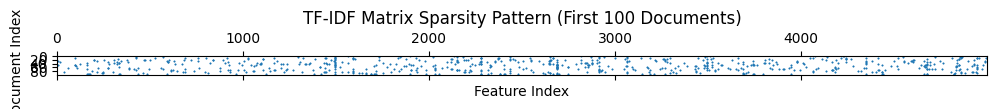

TF-IDF Matrix Shape: (70000, 5000)
Number of non-zero elements: 486341
Sparsity: 99.86%

Top 10 Features:
[('00', np.int64(0)), ('000', np.int64(1)), ('10', np.int64(2)), ('10 10', np.int64(3)), ('10 minutes', np.int64(4)), ('10 years', np.int64(5)), ('100', np.int64(6)), ('1000', np.int64(7)), ('11', np.int64(8)), ('12', np.int64(9))]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer

# Load data
df = pd.read_csv("goemotions_cleaned.csv")
texts = df['cleaned_text'].fillna('').tolist()

# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X_tfidf = tfidf.fit_transform(texts)

# Visualization
plt.figure(figsize=(12, 6))
plt.spy(X_tfidf[:100], markersize=0.5)
plt.title("TF-IDF Matrix Sparsity Pattern (First 100 Documents)")
plt.xlabel("Feature Index")
plt.ylabel("Document Index")
plt.show()

# Print feature statistics
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")
print(f"Number of non-zero elements: {X_tfidf.nnz}")
print(f"Sparsity: {100 * (1 - X_tfidf.nnz / (X_tfidf.shape[0] * X_tfidf.shape[1])):.2f}%")
print("\nTop 10 Features:")
print(sorted(tfidf.vocabulary_.items(), key=lambda x: x[1])[:10])

Word2Vec Embeddings

In [ ]:
!pip install --upgrade numpy  # Upgrade NumPy to the latest version
!pip install --upgrade --force-reinstall gensim  # Reinstall Gensim

  Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (62 kB)
Using cached numpy-2.2.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (16.4 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gensim 4.3.3 requires numpy<2.0,>=1.18.5, but you have numpy 2.2.4 which is incompatible.
tensorflow 2.18.0 requires numpy<2.1.0,>=1.26.0, but you have numpy 2.2.4 which is incompatible.
numba 0.60.0 requires numpy<2.1,>=1.22, but you have numpy 2.2.4 which is incompatible.
  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached numpy-1.26.4-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (

In [ ]:
import pandas as pd
from gensim.models import Word2Vec
import numpy as np
from tqdm import tqdm

# Load preprocessed data
df = pd.read_csv("goemotions_cleaned.csv")
texts = df['cleaned_text'].fillna('').tolist()
tokenized_texts = [text.split() for text in texts]

# Train Word2Vec model
print("Training Word2Vec model...")
w2v_model = Word2Vec(
    sentences=tokenized_texts,
    vector_size=300,
    window=5,
    min_count=3,
    workers=4,
    epochs=10
)

# Document embedding function
def get_embedding(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

# Generate embeddings
X_w2v = np.array([get_embedding(text, w2v_model) for text in tqdm(texts)])
print("Word2Vec matrix shape:", X_w2v.shape)
print("Sample vector:", X_w2v[0][:10])  # First 10 dimensions of first vector

# Save to file
np.save("word2vec_features.npy", X_w2v)
print("Saved to word2vec_features.npy")

Training Word2Vec model...


100%|██████████| 70000/70000 [00:05<00:00, 12289.68it/s]


Word2Vec matrix shape: (70000, 300)
Sample vector: [ 0.12282024  0.38190433  0.66546905  0.7640577   0.04082179 -0.72145754
  0.37619203  0.22762311  0.16073047  1.16993606]
Saved to word2vec_features.npy


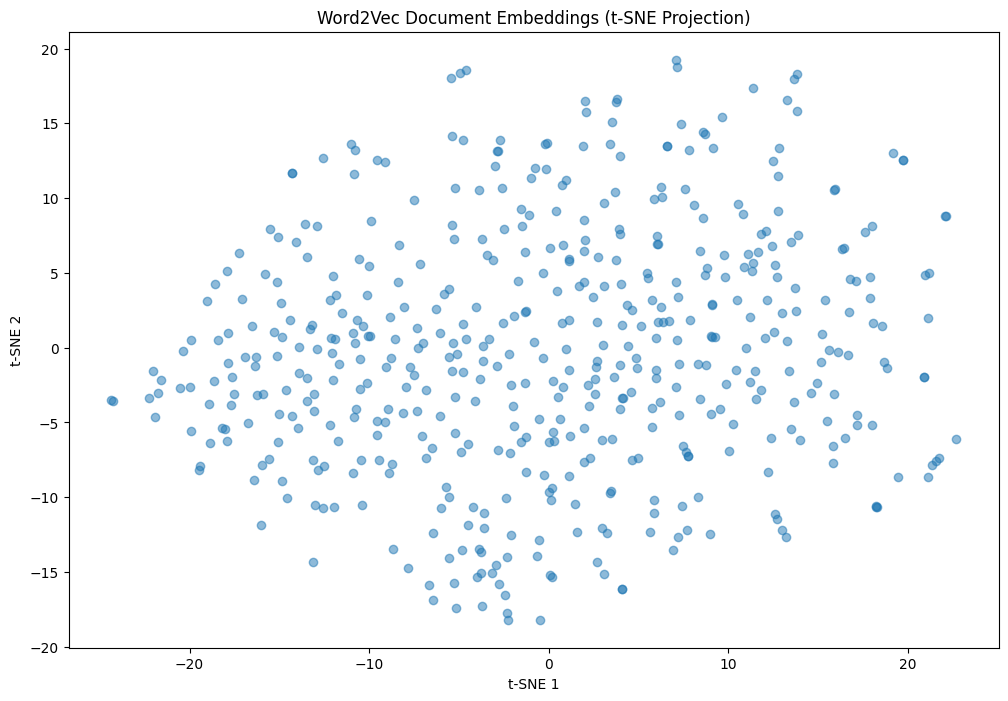

Word2Vec Embeddings Shape: (70000, 300)
Sample Vector (first 10 dims): [ 0.12204652  0.51775849  0.42194405  0.48623747 -0.04236805 -0.83743119
  0.6038425   0.49106073  0.15050967  1.22571945]
Vocabulary Size: 13928

Most Similar Words to 'happy':
[('finally', 0.7045789957046509), ('MRW', 0.6911946535110474), ('sad', 0.6663089394569397), ('glad', 0.6624383926391602), ('sick', 0.6545867919921875)]


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from gensim.models import Word2Vec
from sklearn.manifold import TSNE

# Load data
df = pd.read_csv("goemotions_cleaned.csv")
texts = df['cleaned_text'].fillna('').tolist()
tokenized_texts = [text.split() for text in texts]

# Train Word2Vec
w2v_model = Word2Vec(sentences=tokenized_texts, vector_size=300, window=5, min_count=3, workers=4, epochs=10)

# Get document embeddings
def get_embedding(text, model):
    words = text.split()
    vectors = [model.wv[word] for word in words if word in model.wv]
    return np.mean(vectors, axis=0) if vectors else np.zeros(model.vector_size)

X_w2v = np.array([get_embedding(text, w2v_model) for text in texts])

# Visualization using t-SNE
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_w2v[:500])  # First 500 samples for visualization

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title("Word2Vec Document Embeddings (t-SNE Projection)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

# Print statistics
print(f"Word2Vec Embeddings Shape: {X_w2v.shape}")
print(f"Sample Vector (first 10 dims): {X_w2v[0][:10]}")
print(f"Vocabulary Size: {len(w2v_model.wv)}")
print("\nMost Similar Words to 'happy':")
print(w2v_model.wv.most_similar('happy', topn=5))

BERT Embeddings

In [ ]:
import pandas as pd
import numpy as np
from transformers import BertTokenizer, BertModel
import torch
from tqdm import tqdm

# Load preprocessed data
df = pd.read_csv("goemotions_cleaned.csv")
texts = df['cleaned_text'].fillna('').tolist()

# Initialize BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Embedding function
def get_bert_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in tqdm(range(0, len(texts), batch_size)):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(
            batch,
            padding=True,
            truncation=True,
            max_length=128,
            return_tensors="pt"
        ).to(device)

        with torch.no_grad():
            outputs = model(**inputs)

        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.append(embeddings)

    return np.concatenate(all_embeddings)

# Generate embeddings
X_bert = get_bert_embeddings(texts)
print("BERT embeddings shape:", X_bert.shape)
print("Sample vector:", X_bert[0][:10])  # First 10 dimensions of first vector

# Save to file
np.save("bert_features.npy", X_bert)
print("Saved to bert_features.npy")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

100%|██████████| 2188/2188 [01:40<00:00, 21.72it/s]


BERT embeddings shape: (70000, 768)
Sample vector: [ 0.18852486  0.44309157  0.06959647  0.0363651  -0.0604063  -0.15635657
  0.33705023  0.36079413 -0.062162   -0.33261   ]
Saved to bert_features.npy


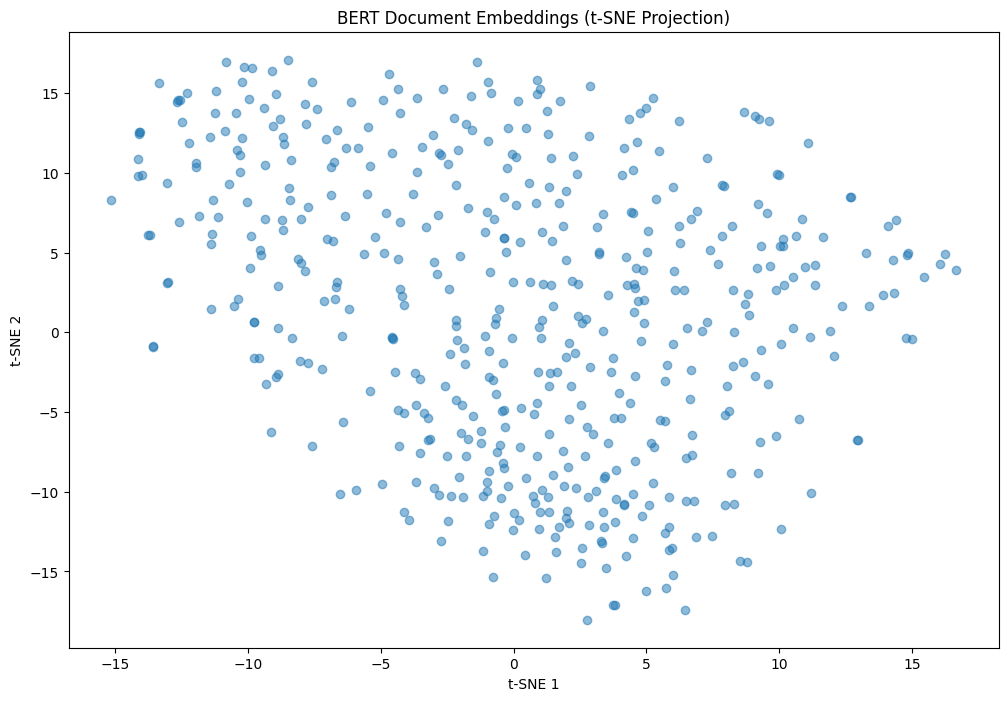

BERT Embeddings Shape: (500, 768)
Sample Vector (first 10 dims): [ 0.18852486  0.44309157  0.06959647  0.0363651  -0.0604063  -0.15635657
  0.33705023  0.36079413 -0.062162   -0.33261   ]
Vector Norm: 14.34


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from transformers import BertTokenizer, BertModel
import torch
from sklearn.manifold import TSNE

# Load data
df = pd.read_csv("goemotions_cleaned.csv")
texts = df['cleaned_text'].fillna('').tolist()

# Initialize BERT
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')
model = BertModel.from_pretrained('bert-base-uncased')
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Batch processing function
def get_bert_embeddings(texts, batch_size=32):
    all_embeddings = []
    for i in range(0, len(texts), batch_size):
        batch = texts[i:i+batch_size]
        inputs = tokenizer(batch, padding=True, truncation=True, max_length=128, return_tensors="pt").to(device)
        with torch.no_grad():
            outputs = model(**inputs)
        embeddings = outputs.last_hidden_state[:, 0, :].cpu().numpy()
        all_embeddings.append(embeddings)
    return np.concatenate(all_embeddings)

# Get embeddings
X_bert = get_bert_embeddings(texts[:500])  # First 500 for visualization

# t-SNE Visualization
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_bert)

plt.figure(figsize=(12, 8))
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], alpha=0.5)
plt.title("BERT Document Embeddings (t-SNE Projection)")
plt.xlabel("t-SNE 1")
plt.ylabel("t-SNE 2")
plt.show()

# Print statistics
print(f"BERT Embeddings Shape: {X_bert.shape}")
print(f"Sample Vector (first 10 dims): {X_bert[0][:10]}")
print(f"Vector Norm: {np.linalg.norm(X_bert[0]):.2f}")

Label Processing (Optional)

In [ ]:
import pandas as pd
import numpy as np

# Load original data
df = pd.read_csv("goemotions_cleaned.csv")

# Option 1: Multi-label emotions
emotion_columns = ['joy', 'anger', 'sadness', 'fear', 'surprise', 'neutral']  # Update with your columns
if all(col in df.columns for col in emotion_columns):
    labels = df[emotion_columns].values
    print("Multi-label shape:", labels.shape)
    np.save("labels.npy", labels)
    print("Saved multi-hot encoded labels to labels.npy")

# Option 2: Single label
elif 'emotion' in df.columns:
    from sklearn.preprocessing import LabelEncoder
    le = LabelEncoder()
    labels = le.fit_transform(df['emotion'])
    print("Single-label classes:", len(le.classes_))
    np.save("labels.npy", labels)
    np.save("label_classes.npy", le.classes_)
    print("Saved encoded labels to labels.npy")
    print("Saved class names to label_classes.npy")

else:
    print("No label columns found")

Multi-label shape: (70000, 6)
Saved multi-hot encoded labels to labels.npy


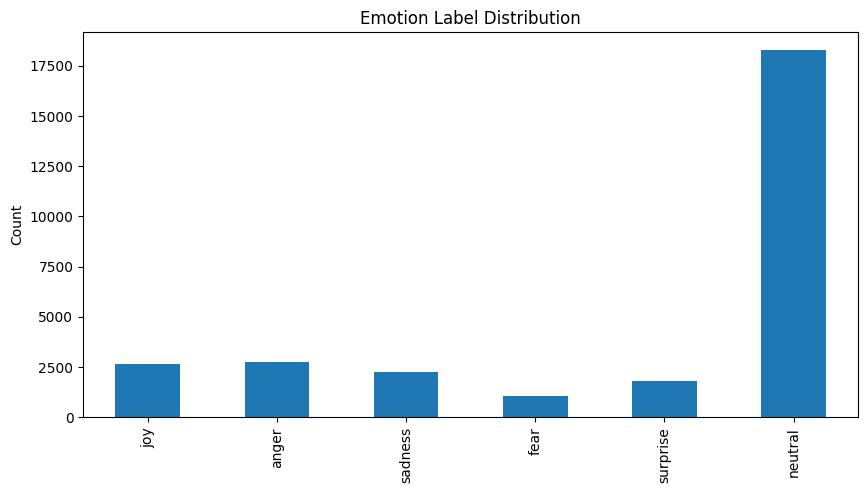

Label counts:
 joy          2655
anger        2762
sadness      2228
fear         1067
surprise     1805
neutral     18259
dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load data
df = pd.read_csv("goemotions_cleaned.csv")

# Check for emotion columns
emotion_cols = ['joy', 'anger', 'sadness', 'fear', 'surprise', 'neutral']
if all(col in df.columns for col in emotion_cols):
    # Multi-label case
    counts = df[emotion_cols].sum()
    plt.figure(figsize=(10, 5))
    counts.plot(kind='bar')
    plt.title("Emotion Label Distribution")
    plt.ylabel("Count")
    plt.show()
    print("Label counts:\n", counts)
elif 'emotion' in df.columns:
    # Single-label case
    plt.figure(figsize=(10, 5))
    df['emotion'].value_counts().plot(kind='bar')
    plt.title("Emotion Label Distribution")
    plt.ylabel("Count")
    plt.show()
    print("Label counts:\n", df['emotion'].value_counts())
else:
    print("No label columns found in the dataset")

In [ ]:
import pandas as pd
import numpy as np

# Load extracted features
X_tfidf = np.load("tfidf_features.npy")
X_w2v = np.load("word2vec_features.npy")
X_bert = np.load("bert_features.npy")
y = np.load("labels.npy")  # Multi-label format

print(f"TF-IDF shape: {X_tfidf.shape}")
print(f"Word2Vec shape: {X_w2v.shape}")
print(f"BERT shape: {X_bert.shape}")
print(f"Labels shape: {y.shape}")

TF-IDF shape: (70000, 5000)
Word2Vec shape: (70000, 300)
BERT shape: (70000, 768)
Labels shape: (70000, 6)


LOGISTIC REGRESSION WITH TF-IDF

Loading dataset...
Detected emotions: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

Creating TF-IDF features...

Training Logistic Regression model...

Classification Report (excluding accuracy):

Emotion: admiration
 Precision: 0.3480
 Recall: 0.7188
 F1-score: 0.4690

Emotion: amusement
 Precision: 0.3940
 Recall: 0.8271
 F1-score: 0.5337

Emotion: anger
 Precision: 0.1648
 Recall: 0.6120
 F1-score: 0.2596

Emotion: annoyance
 Precision: 0.1360
 Recall: 0.5474
 F1-score: 0.2179

Emotion: approval
 Precision: 0.1424
 Recall: 0.4937
 F1-score: 0.2210

Emotion: caring
 Precision: 0.1112
 Recall: 0.5550
 F1-score: 0.1853

Emotion: confusion
 Precision: 0.1107
 Recall: 0.5333
 F1-score: 0.1834

Emotion: c

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


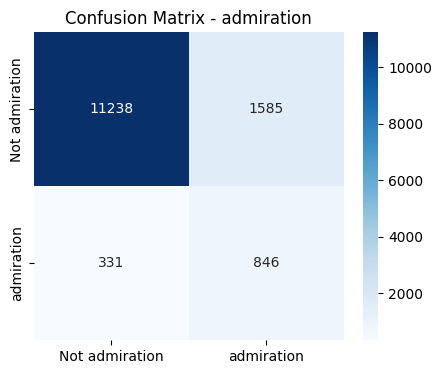

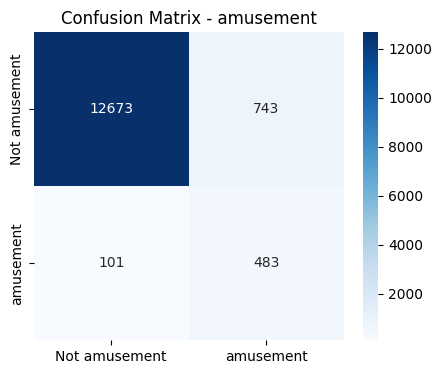

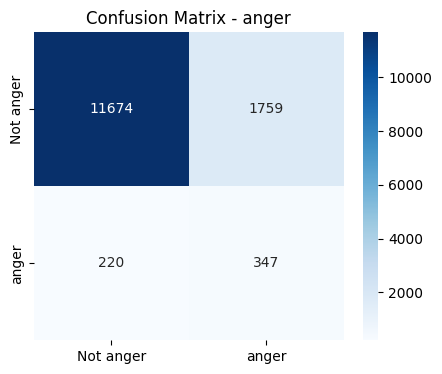

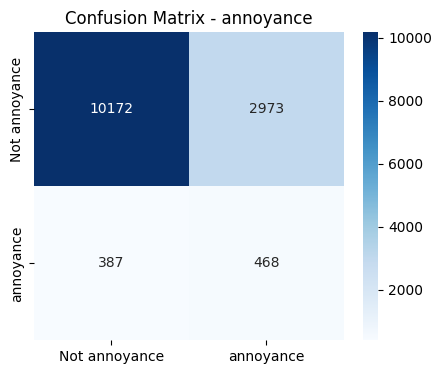

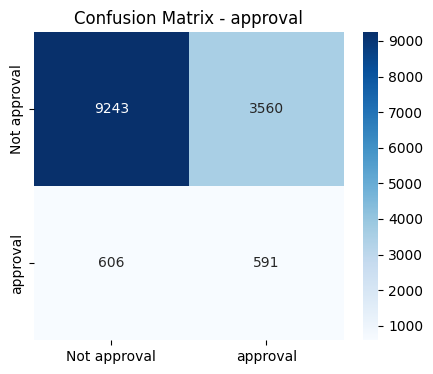

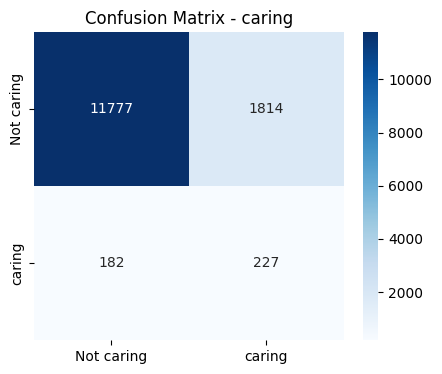

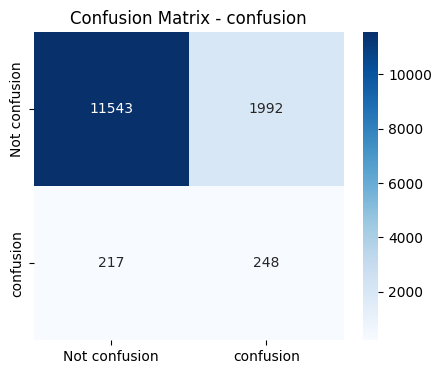

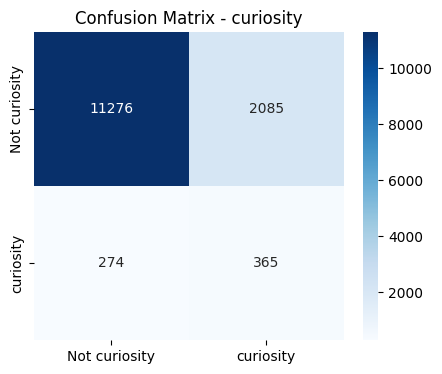

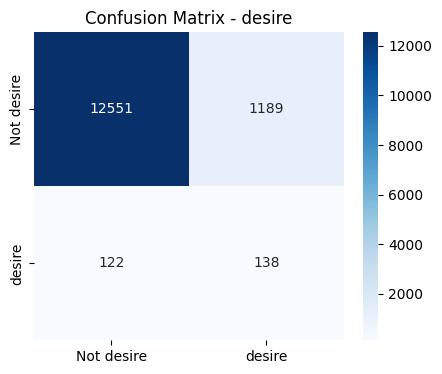

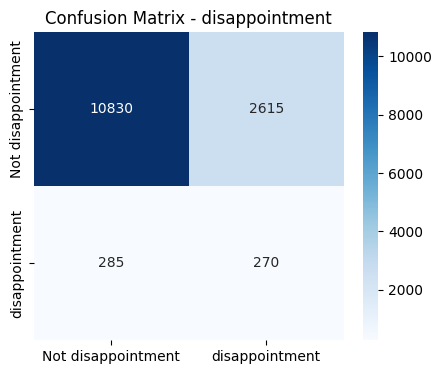

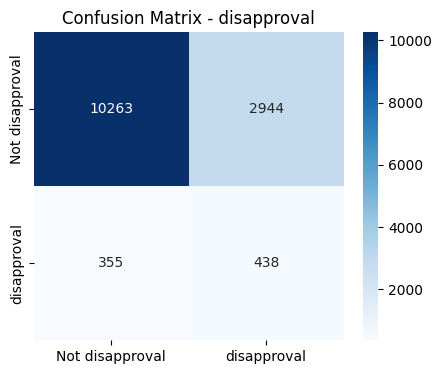

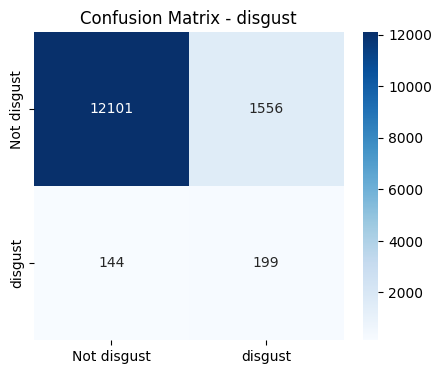

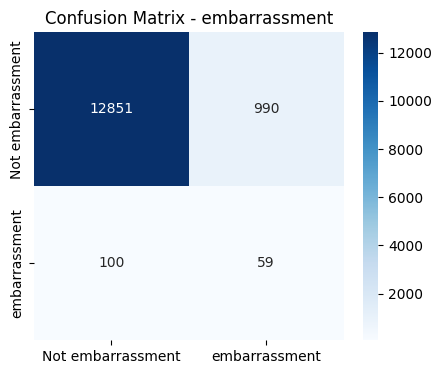

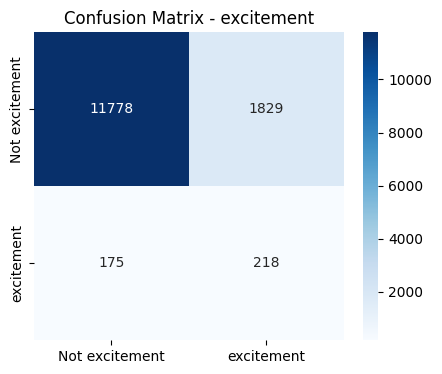

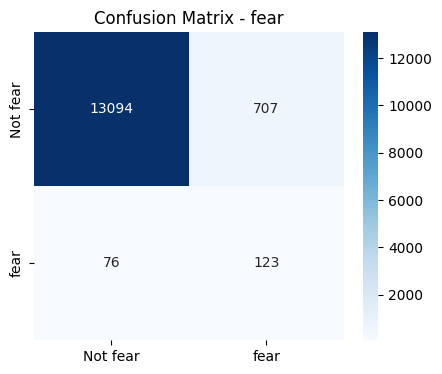

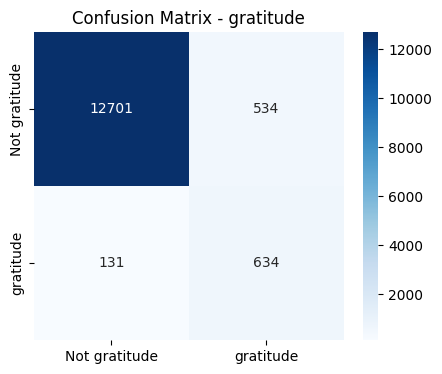

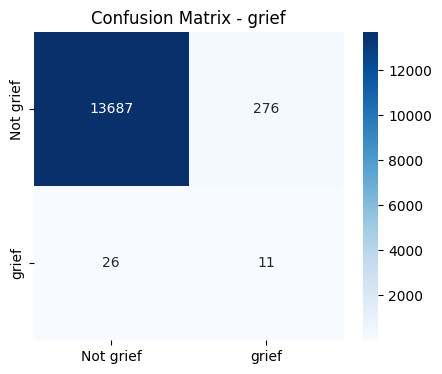

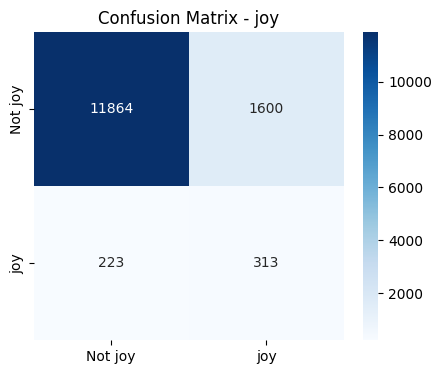

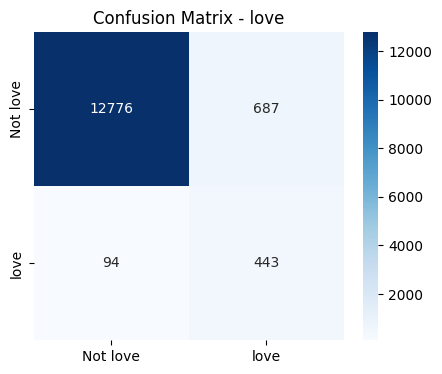

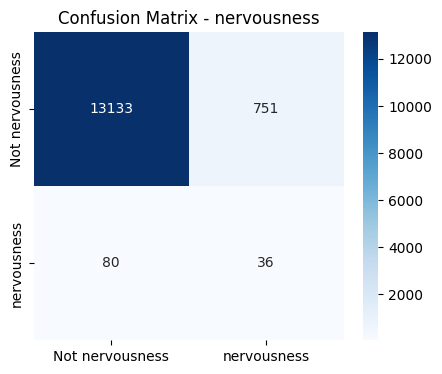

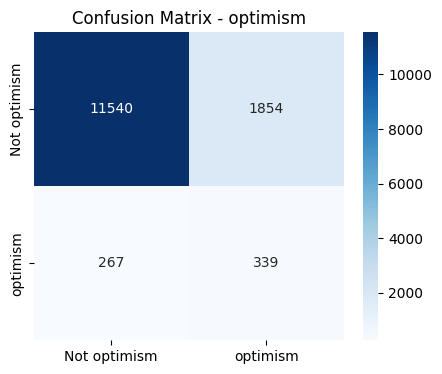

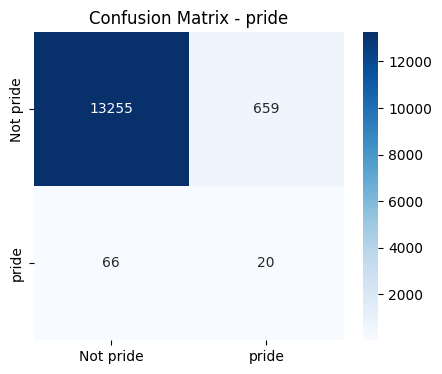

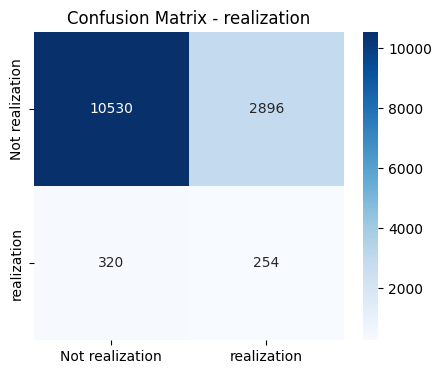

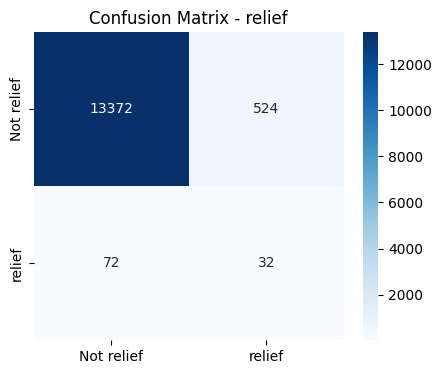

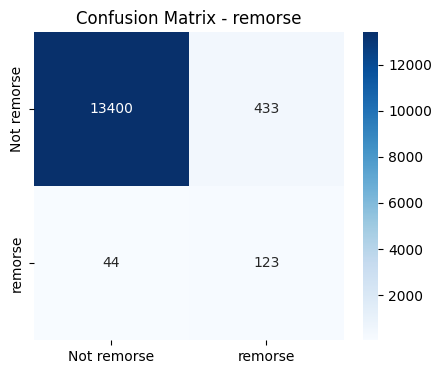

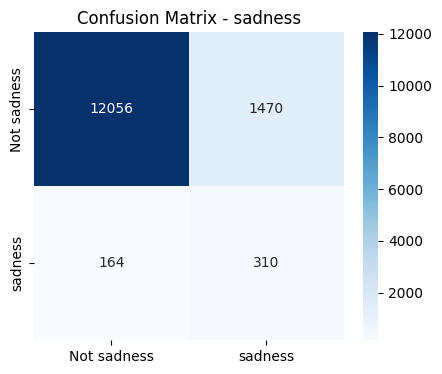

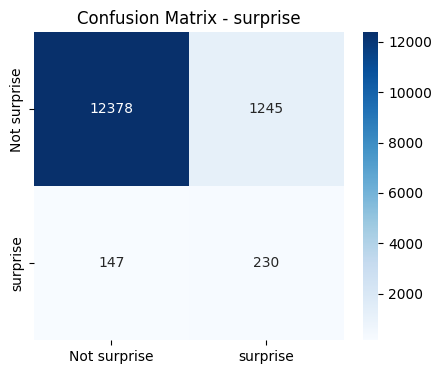

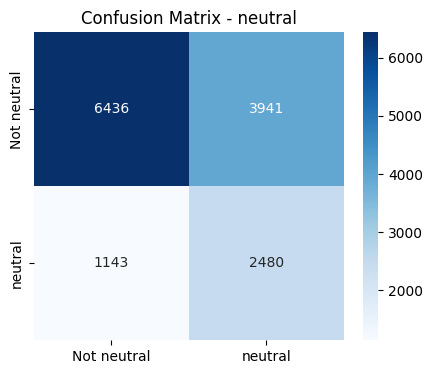


Testing on sample texts from dataset...

Text: Your husband sound smart kind Good say big smile...
True Emotions: admiration, amusement
Predicted Emotions: admiration, amusement, joy

Text: 2 1 seed still play bad team first round...
True Emotions: disgust
Predicted Emotions: disappointment, disapproval, disgust, optimism, neutral

Text: Seen plenty women march call feminists wear hijabs even though not symbol freedom...
True Emotions: disapproval
Predicted Emotions: caring, confusion, curiosity, disapproval, embarrassment, neutral

Text: This...
True Emotions: curiosity
Predicted Emotions: approval, neutral

Text: NAME turn one insisnt wrong side history every single god damn issue...
True Emotions: anger
Predicted Emotions: anger, annoyance, disapproval, pride

Saved: emotion_model.pkl, tfidf_vectorizer.pkl, label_mapping.npy


In [ ]:
# EMOTION DETECTION PIPELINE - LOGISTIC REGRESSION WITH TF-IDF

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.multiclass import OneVsRestClassifier
from sklearn.preprocessing import MultiLabelBinarizer

# 1. LOAD AND PREPARE DATA
print("Loading dataset...")
df = pd.read_csv('/content/goemotions_cleaned.csv')
texts = df['cleaned_text'].fillna('').tolist()

# Auto-detect emotion columns (binary 0/1 columns)
emotion_cols = [col for col in df.columns
               if set(df[col].dropna().unique()).issubset({0, 1})
               and col not in ['id', 'text', 'cleaned_text']
               and df[col].dtype != bool]

if not emotion_cols:
    raise ValueError("No emotion columns found. Expected binary (0/1) columns for emotions.")

print(f"Detected emotions: {emotion_cols}")
y = df[emotion_cols].values

# 2. FEATURE EXTRACTION
print("\nCreating TF-IDF features...")
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))
X = tfidf.fit_transform(texts)

# 3. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 4. MODEL TRAINING
print("\nTraining Logistic Regression model...")
model = OneVsRestClassifier(
    LogisticRegression(max_iter=1000, solver='liblinear', class_weight='balanced')
)
model.fit(X_train, y_train)

# 5. EVALUATION
y_pred = model.predict(X_test)

print("\nClassification Report (excluding accuracy):")
report = classification_report(y_test, y_pred, target_names=emotion_cols, output_dict=True)

# Exclude accuracy and print remaining metrics
for label in emotion_cols:
    print(f"\nEmotion: {label}")
    print(f" Precision: {report[label]['precision']:.4f}")
    print(f" Recall: {report[label]['recall']:.4f}")
    print(f" F1-score: {report[label]['f1-score']:.4f}")

# Confusion Matrix for each emotion
for i, emotion in enumerate(emotion_cols):
    plt.figure(figsize=(5, 4))
    cm = confusion_matrix(y_test[:, i], y_pred[:, i])
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['Not '+emotion, emotion],
                yticklabels=['Not '+emotion, emotion])
    plt.title(f'Confusion Matrix - {emotion}')
    plt.show()

# 6. SAMPLE PREDICTIONS
print("\nTesting on sample texts from dataset...")
sample_df = df.sample(5)
sample_texts = sample_df['cleaned_text'].tolist()
sample_true = sample_df[emotion_cols].values

X_sample = tfidf.transform(sample_texts)
sample_pred = model.predict(X_sample)

for i, text in enumerate(sample_texts):
    print(f"\nText: {text[:100]}...")
    print("True Emotions:", ", ".join([emotion for emotion, val in zip(emotion_cols, sample_true[i]) if val == 1]))
    print("Predicted Emotions:", ", ".join([emotion for emotion, val in zip(emotion_cols, sample_pred[i]) if val == 1]))

# 7. SAVE MODEL ARTIFACTS
import joblib
joblib.dump(model, 'emotion_model.pkl')
joblib.dump(tfidf, 'tfidf_vectorizer.pkl')
np.save('label_mapping.npy', emotion_cols)

print("\nSaved: emotion_model.pkl, tfidf_vectorizer.pkl, label_mapping.npy")


In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. LOAD AND PREPARE DATA
print("Loading dataset...")
df = pd.read_csv('/content/goemotions_cleaned.csv')
texts = df['cleaned_text'].fillna('').tolist()

# Auto-detect emotion columns (binary 0/1 columns)
emotion_cols = [col for col in df.columns
               if set(df[col].dropna().unique()).issubset({0, 1})
               and col not in ['id', 'text', 'cleaned_text']
               and df[col].dtype != bool]

if not emotion_cols:
    raise ValueError("No emotion columns found. Expected binary (0/1) columns for emotions.")

print(f"Detected emotions: {emotion_cols}")
y = df[emotion_cols].values

# 2. TOKENIZATION
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def encode_texts(texts, tokenizer, max_length=128):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# 3. CUSTOM DATASET CLASS
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

# 4. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)
train_dataset = EmotionDataset(X_train, y_train, tokenizer)
test_dataset = EmotionDataset(X_test, y_test, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# 5. MODEL TRAINING
print("\nInitializing BERT model...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(emotion_cols))
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.BCEWithLogitsLoss()

print("\nTraining model...")
for epoch in range(3):  # 3 epochs for quick training
    model.train()
    total_loss = 0
    for batch in train_loader:
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)
        outputs = model(**inputs).logits
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")

# 6. EVALUATION
print("\nEvaluating model...")
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].cpu().numpy()
        outputs = torch.sigmoid(model(**inputs).logits).cpu().numpy()
        y_true.extend(labels)
        y_pred.extend((outputs > 0.5).astype(int))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=emotion_cols))

# 7. SAMPLE PREDICTIONS
def predict_emotions(texts):
    model.eval()
    inputs = encode_texts(texts, tokenizer)
    with torch.no_grad():
        outputs = torch.sigmoid(model(**inputs.to(device)).logits).cpu().numpy()
    return [[emotion for emotion, val in zip(emotion_cols, pred) if val > 0.5] for pred in outputs]

sample_texts = df.sample(5)['cleaned_text'].tolist()
sample_preds = predict_emotions(sample_texts)

for text, pred in zip(sample_texts, sample_preds):
    print(f"\nText: {text[:100]}...")
    print("Predicted Emotions:", ", ".join(pred))

# 8. SAVE MODEL ARTIFACTS
model.save_pretrained("emotion_bert_model")
tokenizer.save_pretrained("emotion_bert_model")
np.save('label_mapping.npy', emotion_cols)

print("\nSaved: emotion_bert_model, label_mapping.npy")

Loading dataset...
Detected emotions: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']

Initializing BERT model...


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training model...
Epoch 1 Loss: 0.1377
Epoch 2 Loss: 0.1177
Epoch 3 Loss: 0.1085

Evaluating model...

Classification Report:
                precision    recall  f1-score   support

    admiration       0.59      0.42      0.49      1177
     amusement       0.59      0.60      0.60       584
         anger       0.46      0.18      0.26       567
     annoyance       0.33      0.02      0.03       855
      approval       0.51      0.08      0.14      1197
        caring       0.38      0.07      0.12       409
     confusion       0.48      0.08      0.13       465
     curiosity       0.66      0.07      0.12       639
        desire       0.41      0.05      0.08       260
disappointment       0.42      0.02      0.04       555
   disapproval       0.46      0.05      0.09       793
       disgust       0.48      0.17      0.25       343
 embarrassment       0.60      0.02      0.04       159
    excitement       0.64      0.09      0.16       393
          fear       0.48      0

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Saved: emotion_bert_model, label_mapping.npy


In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# 1. LOAD AND PREPARE DATA
print("Loading dataset...")
df = pd.read_csv('/content/goemotions_cleaned.csv')
texts = df['cleaned_text'].fillna('').tolist()

# Auto-detect emotion columns (binary 0/1 columns)
emotion_cols = [col for col in df.columns
               if set(df[col].dropna().unique()).issubset({0, 1})
               and col not in ['id', 'text', 'cleaned_text']
               and df[col].dtype != bool]

if not emotion_cols:
    raise ValueError("No emotion columns found. Expected binary (0/1) columns for emotions.")

print(f"Detected emotions: {emotion_cols}")
y = df[emotion_cols].values

# Print a sample label to verify correctness
print("Sample Label:", y[0])

# 2. TOKENIZATION
tokenizer = BertTokenizer.from_pretrained("bert-base-uncased")

def encode_texts(texts, tokenizer, max_length=128):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# 3. CUSTOM DATASET CLASS
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=128, return_tensors='pt')
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

# 4. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)
train_dataset = EmotionDataset(X_train, y_train, tokenizer)
test_dataset = EmotionDataset(X_test, y_test, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True, num_workers=0)  # Fix: Set num_workers=0
test_loader = DataLoader(test_dataset, batch_size=8, num_workers=0)

# 5. MODEL TRAINING
print("\nInitializing BERT model...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

if device.type == "cuda":
    print(f"CUDA is available! GPU: {torch.cuda.get_device_name(0)}")
    torch.cuda.empty_cache()  # Fix: Clear GPU cache before training

model = BertForSequenceClassification.from_pretrained("bert-base-uncased", num_labels=len(emotion_cols))
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.BCEWithLogitsLoss()

print("\nTraining model...")
for epoch in range(1):  # 3 epochs for quick training
    model.train()
    total_loss = 0
    print(f"Epoch {epoch+1} started...")  # Fix: Print when an epoch starts
    for batch_idx, batch in enumerate(train_loader):
        optimizer.zero_grad()

        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)

        outputs = model(**inputs).logits
        loss = criterion(outputs, labels)

        loss.backward()
        optimizer.step()

        total_loss += loss.item()

        if batch_idx % 50 == 0:  # Print loss every 50 batches
            print(f"Batch {batch_idx}/{len(train_loader)} - Loss: {loss.item():.4f}")

    print(f"Epoch {epoch+1} completed! Average Loss: {total_loss / len(train_loader):.4f}")

# 6. EVALUATION
print("\nEvaluating model...")
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].cpu().numpy()
        outputs = torch.sigmoid(model(**inputs).logits).cpu().numpy()

        # Lower threshold to 0.3 for better detection
        y_true.extend(labels)
        y_pred.extend((outputs > 0.3).astype(int))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=emotion_cols))

# 7. SAMPLE PREDICTIONS
def predict_emotions(texts):
    model.eval()
    inputs = encode_texts(texts, tokenizer).to(device)  # Move inputs to the correct device
    with torch.no_grad():
        outputs = torch.sigmoid(model(**inputs).logits).cpu().numpy()
    return [[emotion for emotion, val in zip(emotion_cols, pred) if val > 0.3] for pred in outputs]  # Adjusted threshold

sample_texts = df.sample(5)['cleaned_text'].tolist()
sample_preds = predict_emotions(sample_texts)

for text, pred in zip(sample_texts, sample_preds):
    print(f"\nText: {text[:100]}...")  # Print only first 100 chars for readability
    print("Predicted Emotions:", ", ".join(pred) if pred else "None")

# 8. SAVE MODEL ARTIFACTS
model.save_pretrained("emotion_bert_model")
tokenizer.save_pretrained("emotion_bert_model")

np.save('label_mapping.npy', emotion_cols)

print("\nSaved: emotion_bert_model, label_mapping.npy")


Loading dataset...
Detected emotions: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']
Sample Label: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0]

Initializing BERT model...
Using device: cuda
CUDA is available! GPU: Tesla T4


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.



Training model...
Epoch 1 started...
Batch 0/7000 - Loss: 0.7016
Batch 50/7000 - Loss: 0.3200
Batch 100/7000 - Loss: 0.2098
Batch 150/7000 - Loss: 0.1790
Batch 200/7000 - Loss: 0.1395
Batch 250/7000 - Loss: 0.1601
Batch 300/7000 - Loss: 0.1589
Batch 350/7000 - Loss: 0.1882
Batch 400/7000 - Loss: 0.1478
Batch 450/7000 - Loss: 0.1394
Batch 500/7000 - Loss: 0.1610
Batch 550/7000 - Loss: 0.1218
Batch 600/7000 - Loss: 0.1444
Batch 650/7000 - Loss: 0.1515
Batch 700/7000 - Loss: 0.1573
Batch 750/7000 - Loss: 0.1401
Batch 800/7000 - Loss: 0.1654
Batch 850/7000 - Loss: 0.1863
Batch 900/7000 - Loss: 0.1379
Batch 950/7000 - Loss: 0.1583
Batch 1000/7000 - Loss: 0.1528
Batch 1050/7000 - Loss: 0.1820
Batch 1100/7000 - Loss: 0.1601
Batch 1150/7000 - Loss: 0.1647
Batch 1200/7000 - Loss: 0.1069
Batch 1250/7000 - Loss: 0.1725
Batch 1300/7000 - Loss: 0.1044
Batch 1350/7000 - Loss: 0.1472
Batch 1400/7000 - Loss: 0.1714
Batch 1450/7000 - Loss: 0.1283
Batch 1500/7000 - Loss: 0.1627
Batch 1550/7000 - Loss: 

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Saved: emotion_bert_model, label_mapping.npy


In [ ]:
# Define new sentences for prediction
new_sentences = [
    "I am feeling so happy and excited today!",
    "This is the worst day ever, everything is going wrong.",
    "I'm a bit nervous about my presentation tomorrow.",
    "I love spending time with my family, it brings me so much joy.",
    "I feel completely exhausted and overwhelmed with work."
]

# Predict emotions for the new sentences
new_predictions = predict_emotions(new_sentences)

# Display the results
for text, pred in zip(new_sentences, new_predictions):
    print(f"\nText: {text}")
    print("Predicted Emotions:", ", ".join(pred) if pred else "None")



Text: I am feeling so happy and excited today!
Predicted Emotions: joy

Text: This is the worst day ever, everything is going wrong.
Predicted Emotions: disgust

Text: I'm a bit nervous about my presentation tomorrow.
Predicted Emotions: None

Text: I love spending time with my family, it brings me so much joy.
Predicted Emotions: love

Text: I feel completely exhausted and overwhelmed with work.
Predicted Emotions: sadness


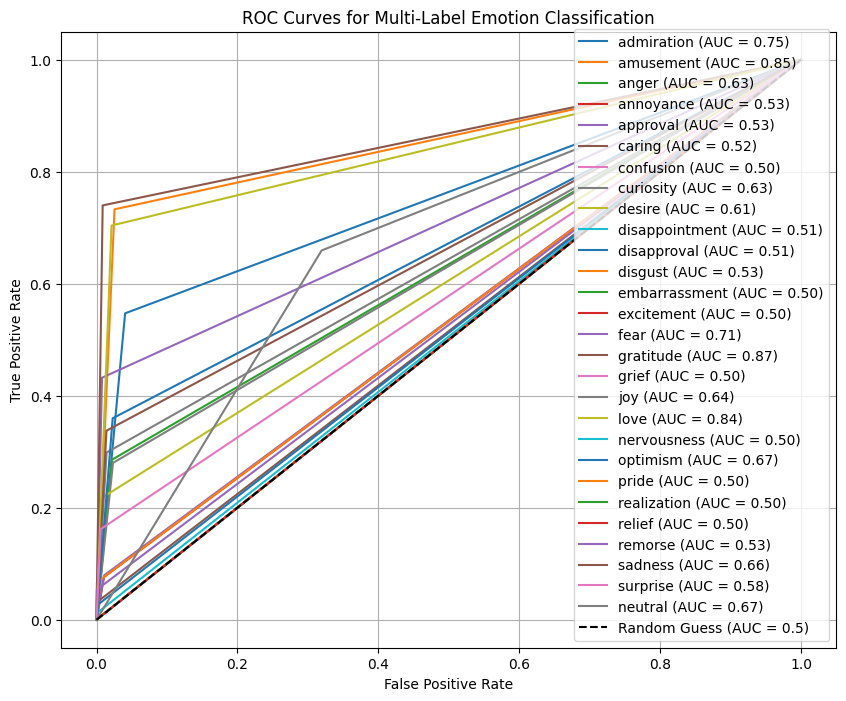

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Plot ROC curve for each emotion
plt.figure(figsize=(10, 8))
for i, emotion in enumerate(emotion_cols):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{emotion} (AUC = {roc_auc:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

# Formatting the graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multi-Label Emotion Classification")
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
import pandas as pd
import numpy as np
from sklearn.utils import resample

# Load dataset
df = pd.read_csv("goemotions_cleaned.csv")  # Update with correct path

# Detect emotion labels (binary columns)
emotion_cols = [col for col in df.columns if df[col].dropna().unique().tolist() in ([0, 1], [1, 0])]

if not emotion_cols:
    raise ValueError("No valid emotion columns found. Expected binary (0/1) emotion labels.")

# Get emotion class counts
class_counts = df[emotion_cols].sum()

# Define balancing threshold (e.g., 1.5x median class count)
median_count = int(np.median(class_counts))
max_samples = int(1.5 * median_count)

# Create a balanced dataset
balanced_df = pd.DataFrame()

for emotion in emotion_cols:
    subset = df[df[emotion] == 1]
    if len(subset) > max_samples:
        balanced_subset = subset.sample(n=max_samples, random_state=42)  # Undersampling
    else:
        balanced_subset = resample(subset, replace=True, n_samples=max_samples, random_state=42)  # Oversampling

    balanced_df = pd.concat([balanced_df, balanced_subset])

# Shuffle balanced dataset
balanced_df = balanced_df.sample(frac=1, random_state=42).reset_index(drop=True)

print("✅ Dataset balanced successfully.")


✅ Dataset balanced successfully.


In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# 1. LOAD AND PREPARE DATA
print("Loading dataset...")
df = pd.read_csv('/content/goemotions_cleaned.csv')
texts = df['cleaned_text'].fillna('').tolist()

# Auto-detect emotion columns (binary 0/1 columns)
emotion_cols = [col for col in df.columns
               if set(df[col].dropna().unique()).issubset({0, 1})
               and col not in ['id', 'text', 'cleaned_text']
               and df[col].dtype != bool]

if not emotion_cols:
    raise ValueError("No emotion columns found. Expected binary (0/1) columns for emotions.")

print(f"Detected emotions: {emotion_cols}")
y = df[emotion_cols].values

# 2. TOKENIZATION
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def encode_texts(texts, tokenizer, max_length=64):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# 3. CUSTOM DATASET CLASS
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=64, return_tensors='pt')
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        item['labels'] = torch.tensor(self.labels[idx], dtype=torch.float)
        return item

# 4. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)
train_dataset = EmotionDataset(X_train, y_train, tokenizer)
test_dataset = EmotionDataset(X_test, y_test, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# 5. MODEL TRAINING
print("\nInitializing DistilBERT model...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = DistilBertForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=len(emotion_cols))
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.BCEWithLogitsLoss()
from torch.cuda.amp import GradScaler, autocast
scaler = GradScaler()

print("\nTraining model...")
for epoch in range(2):  # 3 epochs for quick training
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=False)

    for batch in progress_bar:
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)

        with autocast():
            outputs = model(**inputs).logits
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
        progress_bar.set_postfix(loss=loss.item())

    print(f"Epoch {epoch+1} Loss: {total_loss / len(train_loader):.4f}")

# 6. EVALUATION
print("\nEvaluating model...")
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch in test_loader:
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].cpu().numpy()
        outputs = torch.sigmoid(model(**inputs).logits).cpu().numpy()
        y_true.extend(labels)
        y_pred.extend((outputs > 0.3).astype(int))  # Lower threshold for better prediction coverage

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=emotion_cols))

# 7. SAMPLE PREDICTIONS
def predict_emotions(texts):
    model.eval()
    inputs = encode_texts(texts, tokenizer)
    with torch.no_grad():
        outputs = torch.sigmoid(model(**inputs.to(device)).logits).cpu().numpy()
    predictions = [[emotion for emotion, val in zip(emotion_cols, pred) if val > 0.3] for pred in outputs]
    print("\nRaw Model Outputs:", outputs)  # Debugging statement
    return predictions

sample_texts = df.sample(5)['cleaned_text'].tolist()
sample_preds = predict_emotions(sample_texts)

for text, pred in zip(sample_texts, sample_preds):
    print(f"\nText: {text[:100]}...")
    if pred:
        print("Predicted Emotions:", ", ".join(pred))
    else:
        print("Predicted Emotions: None (Low confidence)")

# 8. SAVE MODEL ARTIFACTS
model.save_pretrained("emotion_bert_model")
tokenizer.save_pretrained("emotion_bert_model")
np.save('label_mapping.npy', emotion_cols)

print("\nSaved: emotion_bert_model, label_mapping.npy")


Loading dataset...
Detected emotions: ['admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]


Initializing DistilBERT model...


model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-26-f0b3c3e65419>:64: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Training model...


Epoch 1:   0%|          | 0/7000 [00:00<?, ?it/s]<ipython-input-26-f0b3c3e65419>:77: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():


Epoch 1 Loss: 0.1358


Epoch 2 Loss: 0.1170

Evaluating model...

Classification Report:
                precision    recall  f1-score   support

    admiration       0.54      0.56      0.55      1177
     amusement       0.55      0.76      0.64       584
         anger       0.38      0.30      0.33       567
     annoyance       0.28      0.11      0.16       855
      approval       0.37      0.15      0.21      1197
        caring       0.26      0.26      0.26       409
     confusion       0.30      0.14      0.19       465
     curiosity       0.39      0.26      0.31       639
        desire       0.45      0.20      0.28       260
disappointment       0.31      0.09      0.14       555
   disapproval       0.46      0.03      0.06       793
       disgust       0.46      0.17      0.25       343
 embarrassment       0.50      0.11      0.18       159
    excitement       0.37      0.16      0.22       393
          fear       0.38      0.49      0.43       199
     gratitude       0.81      0.76  

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_


Saved: emotion_bert_model, label_mapping.npy


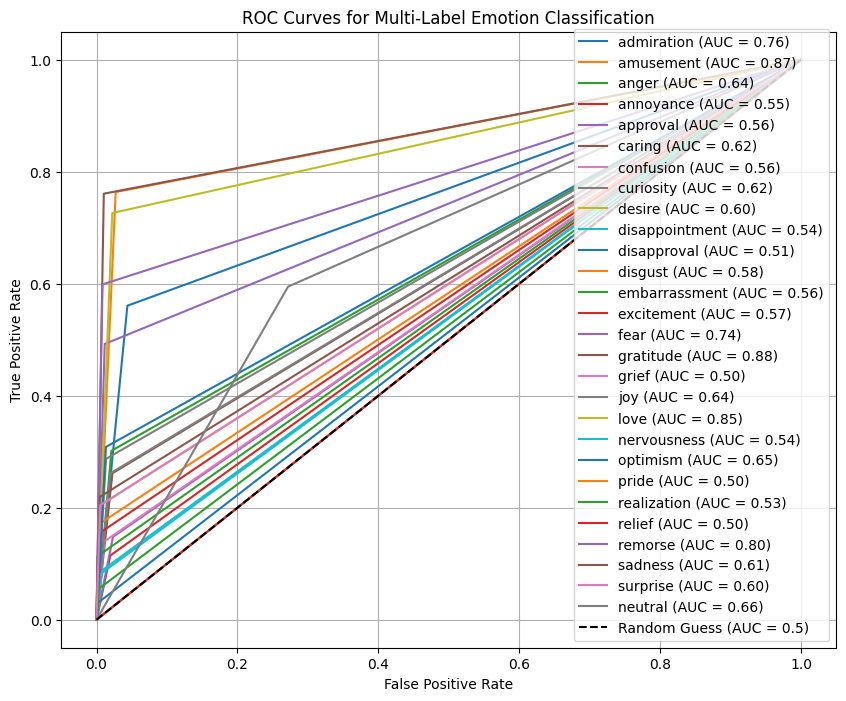

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Convert lists to numpy arrays
y_true = np.array(y_true)
y_pred = np.array(y_pred)

# Plot ROC curve for each emotion
plt.figure(figsize=(10, 8))
for i, emotion in enumerate(emotion_cols):
    fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
    roc_auc = auc(fpr, tpr)

    plt.plot(fpr, tpr, label=f"{emotion} (AUC = {roc_auc:.2f})")

# Plot reference line
plt.plot([0, 1], [0, 1], 'k--', label="Random Guess (AUC = 0.5)")

# Formatting the graph
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curves for Multi-Label Emotion Classification")
plt.legend(loc="lower right")
plt.grid(True)

# Show the plot
plt.show()


In [ ]:
# Define new sentences for prediction
new_sentences = [
    "I can't stop laughing, this is hilarious!",
    "I'm really frustrated with how things turned out today.",
    "Feeling grateful for all the support from my friends.",
    "The tension before the exam is making me so anxious.",
    "Spending a quiet evening alone feels so peaceful."
]


# Predict emotions for the new sentences
new_predictions = predict_emotions(new_sentences)

# Display the results
for text, pred in zip(new_sentences, new_predictions):
    print(f"\nText: {text}")
    print("Predicted Emotions:", ", ".join(pred) if pred else "None")



Raw Model Outputs: [[1.77043602e-02 7.52194107e-01 2.06315611e-02 4.58708033e-02
  3.27185653e-02 5.07701561e-03 2.11325530e-02 2.08401643e-02
  2.55554146e-03 2.18897965e-02 2.77944710e-02 7.37308105e-03
  6.59914594e-03 2.08063368e-02 5.13505377e-03 3.47670051e-03
  7.59418006e-04 1.78668991e-01 3.52021214e-03 2.67772516e-03
  8.16814974e-03 1.98697043e-03 2.71897707e-02 1.22099346e-03
  2.04035244e-03 9.90421139e-03 1.09198084e-02 3.42653356e-02]
 [6.53814059e-03 3.62538151e-03 2.34841838e-01 2.58480400e-01
  4.91671674e-02 3.24185528e-02 1.64346583e-02 1.11883972e-02
  7.72980880e-03 3.33879143e-01 5.50694279e-02 4.73613329e-02
  1.06707783e-02 5.48022566e-03 8.60124361e-03 1.40329869e-03
  6.49278099e-03 8.87947064e-03 4.53275442e-03 9.73840337e-03
  1.10007031e-02 3.24250059e-03 2.91222539e-02 2.35493830e-03
  1.82707608e-02 9.32831988e-02 2.51453184e-03 7.71445781e-02]
 [8.77291709e-02 5.51392371e-03 8.01561691e-04 2.85363034e-03
  6.32668659e-02 1.09688796e-01 1.62072037e-03 2

In [ ]:
import pandas as pd
import numpy as np
import torch
from transformers import AutoTokenizer, AutoModelForSequenceClassification
from torch.utils.data import DataLoader, Dataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from tqdm import tqdm

# 1. LOAD AND PREPARE DATA
print("Loading dataset...")
df = pd.read_csv('/content/goemotions_cleaned.csv')
texts = df['cleaned_text'].fillna('').tolist()

# Auto-detect emotion columns (binary 0/1)
emotion_cols = [col for col in df.columns if set(df[col].dropna().unique()).issubset({0, 1}) and col not in ['id', 'text', 'cleaned_text']]
if not emotion_cols:
    raise ValueError("No emotion columns found. Expected binary (0/1) columns for emotions.")

print(f"Detected emotions: {emotion_cols}")
y = df[emotion_cols].values

# 2. TOKENIZATION
deberta_model = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(deberta_model)

def encode_texts(texts, tokenizer, max_length=64):
    return tokenizer(texts, padding=True, truncation=True, max_length=max_length, return_tensors='pt')

# 3. CUSTOM DATASET CLASS
class EmotionDataset(Dataset):
    def __init__(self, texts, labels, tokenizer):
        self.texts = texts
        self.labels = labels
        self.tokenizer = tokenizer

    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        encoding = self.tokenizer(self.texts[idx], padding='max_length', truncation=True, max_length=64, return_tensors='pt')
        item = {key: val.squeeze(0) for key, val in encoding.items()}
        # Convert labels to numerical format before creating the tensor
        item['labels'] = torch.tensor(self.labels[idx].astype(np.float32), dtype=torch.float)
        return item

# 4. TRAIN-TEST SPLIT
X_train, X_test, y_train, y_test = train_test_split(texts, y, test_size=0.2, random_state=42)
train_dataset = EmotionDataset(X_train, y_train, tokenizer)
test_dataset = EmotionDataset(X_test, y_test, tokenizer)
train_loader = DataLoader(train_dataset, batch_size=8, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=8)

# 5. MODEL TRAINING
print("\nInitializing DeBERTa model...")
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = AutoModelForSequenceClassification.from_pretrained(deberta_model, num_labels=len(emotion_cols))
model.to(device)
optimizer = torch.optim.AdamW(model.parameters(), lr=2e-5)
criterion = torch.nn.BCEWithLogitsLoss()
from torch.cuda.amp import GradScaler, autocast
scaler = GradScaler()

print("\nTraining model...")
for epoch in range(2):  # Reduced to 2 epochs for faster training
    model.train()
    total_loss = 0
    progress_bar = tqdm(train_loader, desc=f"Epoch {epoch+1}", leave=True, dynamic_ncols=True)

    for batch in progress_bar:
        optimizer.zero_grad()
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].to(device)

        with autocast():
            outputs = model(**inputs).logits
            loss = criterion(outputs, labels)

        scaler.scale(loss).backward()
        scaler.step(optimizer)
        scaler.update()

        total_loss += loss.item()
        progress_bar.set_postfix({'loss': f"{loss.item():.4f}"})

    print(f"\nEpoch {epoch+1} completed. Average Loss: {total_loss / len(train_loader):.4f}")

# 6. EVALUATION
print("\nEvaluating model...")
model.eval()
y_true, y_pred = [], []
with torch.no_grad():
    for batch in tqdm(test_loader, desc="Evaluating"):
        inputs = {key: val.to(device) for key, val in batch.items() if key != 'labels'}
        labels = batch['labels'].cpu().numpy()
        outputs = torch.sigmoid(model(**inputs).logits).cpu().numpy()
        y_true.extend(labels)
        y_pred.extend((outputs > 0.3).astype(int))

print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=emotion_cols))

# 7. FAST PREDICTIONS WITH ACCURACY CHECK
df_sample = df.sample(n=10, random_state=42)  # Quick test with 10 texts
sample_texts = df_sample['cleaned_text'].tolist()

def predict_emotions(texts, model, tokenizer, emotion_cols, threshold=0.3):
    model.eval()
    inputs = encode_texts(texts, tokenizer)
    with torch.no_grad():
        outputs = torch.sigmoid(model(**inputs.to(device)).logits).cpu().numpy()

    predictions = []
    for pred in outputs:
        detected_emotions = [emotion for emotion, val in zip(emotion_cols, pred) if val > threshold]
        predictions.append(detected_emotions if detected_emotions else ["None (Low confidence)"])

    return predictions

sample_preds = predict_emotions(sample_texts, model, tokenizer, emotion_cols)

for text, pred, actual in zip(sample_texts, sample_preds, df_sample[emotion_cols].values):
    actual_emotions = [emotion for emotion, val in zip(emotion_cols, actual) if val == 1]
    print(f"\nText: {text[:100]}...")  # Show only first 100 characters
    print(f"Predicted Emotions: {', '.join(pred)}")
    print(f"Actual Emotions: {', '.join(actual_emotions) if actual_emotions else 'None'}")

# 8. SAVE MODEL ARTIFACTS
model.save_pretrained("emotion_deberta_model")
tokenizer.save_pretrained("emotion_deberta_model")
np.save('label_mapping.npy', emotion_cols)

print("\nSaved: emotion_deberta_model, label_mapping.npy")


Loading dataset...
Detected emotions: ['example_very_unclear', 'admiration', 'amusement', 'anger', 'annoyance', 'approval', 'caring', 'confusion', 'curiosity', 'desire', 'disappointment', 'disapproval', 'disgust', 'embarrassment', 'excitement', 'fear', 'gratitude', 'grief', 'joy', 'love', 'nervousness', 'optimism', 'pride', 'realization', 'relief', 'remorse', 'sadness', 'surprise', 'neutral']


/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(



Initializing DeBERTa model...


Some weights of DebertaV2ForSequenceClassification were not initialized from the model checkpoint at microsoft/deberta-v3-base and are newly initialized: ['classifier.bias', 'classifier.weight', 'pooler.dense.bias', 'pooler.dense.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
<ipython-input-31-2456136a91f3>:62: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  scaler = GradScaler()



Training model...


Epoch 1:   0%|          | 0/7000 [00:00<?, ?it/s]<ipython-input-31-2456136a91f3>:75: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  with autocast():
Epoch 1: 100%|██████████| 7000/7000 [17:53<00:00,  6.52it/s, loss=0.1675]



Epoch 1 completed. Average Loss: 0.1374


Epoch 2: 100%|██████████| 7000/7000 [18:06<00:00,  6.44it/s, loss=0.1548]



Epoch 2 completed. Average Loss: 0.1198

Evaluating model...


Evaluating: 100%|██████████| 1750/1750 [01:11<00:00, 24.41it/s]
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))



Classification Report:
                      precision    recall  f1-score   support

example_very_unclear       0.00      0.00      0.00       215
          admiration       0.51      0.61      0.55      1177
           amusement       0.53      0.78      0.63       584
               anger       0.37      0.31      0.34       567
           annoyance       0.00      0.00      0.00       855
            approval       0.35      0.16      0.22      1197
              caring       0.38      0.11      0.17       409
           confusion       0.36      0.10      0.15       465
           curiosity       0.37      0.28      0.32       639
              desire       0.47      0.23      0.31       260
      disappointment       0.31      0.02      0.03       555
         disapproval       0.38      0.07      0.12       793
             disgust       0.32      0.19      0.23       343
       embarrassment       0.00      0.00      0.00       159
          excitement       0.41      0.12    

In [ ]:
# Define new sentences for prediction
new_sentences = [
    "I can't believe this moment is real, I'm so excited!",
    "Everything feels so overwhelming, I just want to give up.",
    "I feel truly blessed to have such wonderful people in my life.",
    "My heart is racing with nervousness before the big speech.",
    "The sound of rain outside makes me feel so relaxed."
]

# Load the DeBERTa model and tokenizer
# Load the DeBERTa model and tokenizer
deberta_model = "microsoft/deberta-v3-base"
tokenizer = AutoTokenizer.from_pretrained(deberta_model)

# Load emotion column names (make sure it's consistent with the saved model)
emotion_cols = np.load('label_mapping.npy', allow_pickle=True).tolist()

# Specify the correct number of labels when loading the model
model = AutoModelForSequenceClassification.from_pretrained("emotion_deberta_model", num_labels=len(emotion_cols))
model.to(device)  # Ensure the model is on the correct device

# Load the emotion column names
emotion_cols = np.load('label_mapping.npy', allow_pickle=True).tolist()  # Convert to list

# Predict emotions for the new sentences
new_predictions = predict_emotions(new_sentences, model, tokenizer, emotion_cols)

# Display the results
for text, pred in zip(new_sentences, new_predictions):
    print(f"\nText: {text}")
    print("Predicted Emotions:", ", ".join(pred) if pred else "None")

/usr/local/lib/python3.11/dist-packages/transformers/convert_slow_tokenizer.py:559: UserWarning: The sentencepiece tokenizer that you are converting to a fast tokenizer uses the byte fallback option which is not implemented in the fast tokenizers. In practice this means that the fast version of the tokenizer can produce unknown tokens whereas the sentencepiece version would have converted these unknown tokens into a sequence of byte tokens matching the original piece of text.
  warnings.warn(



Text: I can't believe this moment is real, I'm so excited!
Predicted Emotions: excitement, surprise

Text: Everything feels so overwhelming, I just want to give up.
Predicted Emotions: sadness

Text: I feel truly blessed to have such wonderful people in my life.
Predicted Emotions: admiration, joy

Text: My heart is racing with nervousness before the big speech.
Predicted Emotions: fear

Text: The sound of rain outside makes me feel so relaxed.
Predicted Emotions: joy
